## Spotipy API

Create an Spotify account and follow these steps to register an app: https://developer.spotify.com/documentation/general/guides/app-settings/

After the app is created, you can see it on your dashboard
https://developer.spotify.com/dashboard/applications

Click on it and you'll find the client id and client secret.

Import Libraries

In [373]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import getpass
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
import requests
import random

## Password security 

In [105]:
client_id=str(getpass.getpass('client_id?'))
client_secret=str(getpass.getpass('client_secret?'))

client_id?········
client_secret?········


In [205]:
#Initialize SpotiPy with user credentials (see password section below)

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

#### Playlist import

In [206]:
playlist = sp.user_playlist_tracks("Walter", "3VE0WsnukXaPrNKazIgAWx")

In [207]:
playlist1 = sp.user_playlist_tracks("Andrea Fought","5mzECKhirkq6GKtsAvvtsx")

In [208]:
playlist2= sp.user_playlist_tracks("Spotify","37i9dQZF1DXbXD9pMSZomS") 

In [209]:
playlist3= sp.user_playlist_tracks("Spotify","37i9dQZF1DX0r3x8OtiwEM")   

In [210]:
playlist4=sp.user_playlist_tracks("Maria Paradell", "7MkQSGPP5ImrZpmTw5vyAp")

In [211]:
playlist5=sp.user_playlist_tracks("Walter","39KvOzjZCHb7ZrxhT3AX5a")

In [212]:
playlist6=sp.user_playlist_tracks("Walter","3nEqaksi7BK6c6lSca7ocF")

In [213]:
playlist7=sp.user_playlist_tracks("Alfonso Peña","07L4PVTpeuzHJkeEz4iggs")

In [214]:
playlist8=sp.user_playlist_tracks("Eric Shoemaker","2ZggLIDqac8GLh3NvuSY5d")

In [215]:
playlist9=sp.user_playlist_tracks("Andrea Ribó","2b5O7A12NefJUhNAYeWxXH")

In [216]:
playlist10=sp.user_playlist_tracks("Pablo Morillo","4Kjib49e5gleKbslnywJB9")

Spotify songs are identified by either a "url", a "uri" or an "id". 

- The `id` is an alphanumeric code, and it's the nuclear part of the identifier.

- The `uri` contains "spotify:track" before the id. An uri is useful because it can be searched manually in the Spotify app.

- The `url` is a link to the song on the Spotify web player.

We'll use the `uri` in this code-along, but feel free to use whatever you think fits best your needs.

In [217]:
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [218]:
playlist['items'][0]['track']['name']

'Lightweight - Sandy Rivera Remix'

In [219]:
playlist['items'][0]['track']['artists'][0]['name']

'Jason Burns'

In [220]:
playlist_names = []
for item in playlist['items']:
        playlist_names.append(item['track']['name'])

In [221]:
playlist_artists = []
for i in playlist['items']:
        playlist_artists.append(i['track']['artists'][0]['name'])

In [222]:
playlist_uri=[]
for item in playlist['items']:
    playlist_uri.append(item['track']['uri'])

In [162]:
audio_playlist_df=pd.DataFrame(sp.audio_features(tracks=playlist_uri))

In [163]:
audio_playlist_df['Name'] = playlist_names

In [164]:
audio_playlist_df['Artist'] = playlist_artists

In [224]:
playlist1_names = []
for item in playlist1['items']:
        playlist1_names.append(item['track']['name'])

In [225]:
playlist1_artists = []
for i in playlist1['items']:
        playlist1_artists.append(i['track']['artists'][0]['name'])

In [226]:
playlist1_uri=[]
for item in playlist1['items']:
    playlist1_uri.append(item['track']['uri'])

In [227]:
audio_playlist1_df=pd.DataFrame(sp.audio_features(tracks=playlist1_uri))

In [228]:
audio_playlist1_df['Name'] = playlist1_names

In [229]:
audio_playlist1_df['Artist'] = playlist1_artists

In [230]:
audio_playlist1_df.shape

(100, 20)

In [231]:
playlist2_names = []
for item in playlist2['items']:
        playlist2_names.append(item['track']['name'])

In [232]:
playlist2_artists = []
for i in playlist2['items']:
        playlist2_artists.append(i['track']['artists'][0]['name'])

In [233]:
playlist2_uri=[]
for item in playlist2['items']:
    playlist2_uri.append(item['track']['uri'])

In [234]:
audio_playlist2_df=pd.DataFrame(sp.audio_features(tracks=playlist2_uri))

In [235]:
audio_playlist2_df['Name'] = playlist2_names

In [236]:
audio_playlist2_df['Artist'] = playlist2_artists

In [237]:
playlist3_names = []
for item in playlist3['items']:
        playlist3_names.append(item['track']['name'])

In [238]:
playlist3_artists = []
for i in playlist3['items']:
        playlist3_artists.append(i['track']['artists'][0]['name'])

In [239]:
playlist3_uri=[]
for item in playlist3['items']:
    playlist3_uri.append(item['track']['uri'])

In [240]:
audio_playlist3_df=pd.DataFrame(sp.audio_features(tracks=playlist3_uri))

In [241]:
audio_playlist3_df['Name'] = playlist3_names

In [242]:
audio_playlist3_df['Artist'] = playlist3_artists

In [183]:
playlist4_names = []
for item in playlist4['items']:
        playlist4_names.append(item['track']['name'])

In [184]:
playlist4_artists = []
for i in playlist4['items']:
        playlist4_artists.append(i['track']['artists'][0]['name'])

In [185]:
playlist4_uri=[]
for item in playlist4['items']:
    playlist4_uri.append(item['track']['uri'])

In [186]:
audio_playlist4_df=pd.DataFrame(sp.audio_features(tracks=playlist4_uri))

In [187]:
audio_playlist4_df['Name'] = playlist4_names

In [188]:
audio_playlist4_df['Artist'] = playlist4_artists

In [189]:
playlist5_names = []
for item in playlist5['items']:
        playlist5_names.append(item['track']['name'])

In [190]:
playlist5_artists = []
for i in playlist5['items']:
        playlist5_artists.append(i['track']['artists'][0]['name'])

In [191]:
playlist5_uri=[]
for item in playlist5['items']:
    playlist5_uri.append(item['track']['uri'])

In [192]:
audio_playlist5_df=pd.DataFrame(sp.audio_features(tracks=playlist5_uri))

In [193]:
audio_playlist5_df['Name'] = playlist5_names

In [194]:
audio_playlist5_df['Artist'] = playlist5_artists

In [195]:
playlist6_names = []
for item in playlist6['items']:
        playlist6_names.append(item['track']['name'])

In [196]:
playlist6_artists = []
for i in playlist6['items']:
        playlist6_artists.append(i['track']['artists'][0]['name'])

In [197]:
playlist6_uri=[]
for item in playlist6['items']:
    playlist6_uri.append(item['track']['uri'])

In [198]:
audio_playlist6_df=pd.DataFrame(sp.audio_features(tracks=playlist6_uri))

In [199]:
audio_playlist6_df['Name'] = playlist6_names

In [200]:
audio_playlist6_df['Artist'] = playlist6_artists

In [251]:
playlist7_names = []
for item in playlist7['items']:
        playlist7_names.append(item['track']['name'])

In [247]:
playlist7_artists = []
for i in playlist7['items']:
        playlist7_artists.append(i['track']['artists'][0]['name'])

In [248]:
playlist7_uri=[]
for item in playlist7['items']:
    playlist7_uri.append(item['track']['uri'])

In [249]:
audio_playlist7_df=pd.DataFrame(sp.audio_features(tracks=playlist7_uri))

In [252]:
audio_playlist7_df['Name'] = playlist7_names

In [253]:
audio_playlist6_df['Artist'] = playlist6_artists

In [254]:
playlist8_names = []
for item in playlist8['items']:
        playlist8_names.append(item['track']['name'])

In [255]:
playlist8_artists = []
for i in playlist8['items']:
        playlist8_artists.append(i['track']['artists'][0]['name'])

In [256]:
playlist8_uri=[]
for item in playlist8['items']:
    playlist8_uri.append(item['track']['uri'])

In [257]:
audio_playlist8_df=pd.DataFrame(sp.audio_features(tracks=playlist8_uri))

In [258]:
audio_playlist8_df['Name'] = playlist8_names

In [259]:
audio_playlist8_df['Artist'] = playlist8_artists

In [260]:
playlist9_names = []
for item in playlist9['items']:
        playlist9_names.append(item['track']['name'])

In [261]:
playlist9_artists = []
for i in playlist9['items']:
        playlist9_artists.append(i['track']['artists'][0]['name'])

In [262]:
playlist9_uri=[]
for item in playlist9['items']:
    playlist9_uri.append(item['track']['uri'])

In [263]:
audio_playlist9_df=pd.DataFrame(sp.audio_features(tracks=playlist9_uri))

In [264]:
audio_playlist9_df['Name'] = playlist9_names

In [265]:
audio_playlist9_df['Artist'] = playlist9_artists

In [267]:
playlist10_names = []
for item in playlist10['items']:
        playlist10_names.append(item['track']['name'])

In [268]:
playlist10_artists = []
for i in playlist10['items']:
        playlist10_artists.append(i['track']['artists'][0]['name'])

In [269]:
playlist10_uri=[]
for item in playlist10['items']:
    playlist10_uri.append(item['track']['uri'])

In [270]:
audio_playlist10_df=pd.DataFrame(sp.audio_features(tracks=playlist10_uri))

In [271]:
audio_playlist10_df['Name'] = playlist10_names

In [272]:
audio_playlist10_df['Artist'] = playlist10_artists

In [435]:
playlist_final = pd.concat([audio_playlist_df,audio_playlist1_df,audio_playlist2_df,audio_playlist3_df,audio_playlist4_df,audio_playlist5_df,audio_playlist6_df,audio_playlist7_df,audio_playlist8_df,audio_playlist9_df,audio_playlist10_df])


In [436]:
playlist_final.shape

(973, 20)

In [437]:
playlist_final

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Name,Artist
0,0.774,0.505,5,-9.047,0,0.0469,0.012000,0.0416,0.1070,0.4460,118.010,audio_features,0YDiCJBXYH6qmp2oIlPf6Z,spotify:track:0YDiCJBXYH6qmp2oIlPf6Z,https://api.spotify.com/v1/tracks/0YDiCJBXYH6q...,https://api.spotify.com/v1/audio-analysis/0YDi...,391397,4,Lightweight - Sandy Rivera Remix,Jason Burns
1,0.795,0.558,9,-7.939,0,0.0312,0.118000,0.0591,0.1050,0.2460,112.029,audio_features,5mEdU0a2nw4vsuA8Pr8Av2,spotify:track:5mEdU0a2nw4vsuA8Pr8Av2,https://api.spotify.com/v1/tracks/5mEdU0a2nw4v...,https://api.spotify.com/v1/audio-analysis/5mEd...,209648,4,War (feat. August+Us),Witness
2,0.867,0.603,2,-7.427,0,0.0637,0.356000,0.0553,0.0765,0.6770,114.977,audio_features,6MzuROznsagl5Szc8w3Smj,spotify:track:6MzuROznsagl5Szc8w3Smj,https://api.spotify.com/v1/tracks/6MzuROznsagl...,https://api.spotify.com/v1/audio-analysis/6Mzu...,225181,4,Something About You,Hayden James
3,0.817,0.623,8,-6.856,1,0.0603,0.034900,0.2770,0.0619,0.5060,115.989,audio_features,0JNBcMPvsCeH8Ac4praGMo,spotify:track:0JNBcMPvsCeH8Ac4praGMo,https://api.spotify.com/v1/tracks/0JNBcMPvsCeH...,https://api.spotify.com/v1/audio-analysis/0JNB...,380690,4,Dolphins - Dub Mix,Freddy Verano
4,0.790,0.647,8,-6.732,0,0.0375,0.200000,0.1090,0.0766,0.7490,105.012,audio_features,3hxRKXzZS0XRYGZ123JDNH,spotify:track:3hxRKXzZS0XRYGZ123JDNH,https://api.spotify.com/v1/tracks/3hxRKXzZS0XR...,https://api.spotify.com/v1/audio-analysis/3hxR...,194707,4,Djon maya maï (feat. Victor Démé),Synapson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.798,0.880,11,-6.626,1,0.0445,0.000768,0.9270,0.1070,0.0685,125.992,audio_features,4b7qHjTUwT752wMn6BCxVK,spotify:track:4b7qHjTUwT752wMn6BCxVK,https://api.spotify.com/v1/tracks/4b7qHjTUwT75...,https://api.spotify.com/v1/audio-analysis/4b7q...,398229,4,Nine of You,Adam Beyer
96,0.809,0.746,7,-12.131,1,0.0468,0.000061,0.9400,0.1140,0.0370,121.998,audio_features,7KvBNIC7MEQLTpC7RbTMtI,spotify:track:7KvBNIC7MEQLTpC7RbTMtI,https://api.spotify.com/v1/tracks/7KvBNIC7MEQL...,https://api.spotify.com/v1/audio-analysis/7KvB...,484841,4,Holding Pattern,Karmon
97,0.688,0.961,9,-8.262,1,0.0432,0.169000,0.7810,0.1080,0.3070,135.118,audio_features,3RCYUa66bzSqIXQ34QGeHd,spotify:track:3RCYUa66bzSqIXQ34QGeHd,https://api.spotify.com/v1/tracks/3RCYUa66bzSq...,https://api.spotify.com/v1/audio-analysis/3RCY...,505465,4,Voco Me - Flim Flam Remix,DJ Icon
98,0.802,0.588,10,-11.046,0,0.0595,0.029900,0.8780,0.0822,0.0506,128.989,audio_features,2BWiEuSIWsagua4DewdXY5,spotify:track:2BWiEuSIWsagua4DewdXY5,https://api.spotify.com/v1/tracks/2BWiEuSIWsag...,https://api.spotify.com/v1/audio-analysis/2BWi...,419351,4,Exile 007 B2,Johannes Heil


In [438]:
#EDA

In [439]:
playlist_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 0 to 99
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      973 non-null    float64
 1   energy            973 non-null    float64
 2   key               973 non-null    int64  
 3   loudness          973 non-null    float64
 4   mode              973 non-null    int64  
 5   speechiness       973 non-null    float64
 6   acousticness      973 non-null    float64
 7   instrumentalness  973 non-null    float64
 8   liveness          973 non-null    float64
 9   valence           973 non-null    float64
 10  tempo             973 non-null    float64
 11  type              973 non-null    object 
 12  id                973 non-null    object 
 13  uri               973 non-null    object 
 14  track_href        973 non-null    object 
 15  analysis_url      973 non-null    object 
 16  duration_ms       973 non-null    int64  
 17

In [440]:
playlist_final = playlist_final.drop_duplicates()

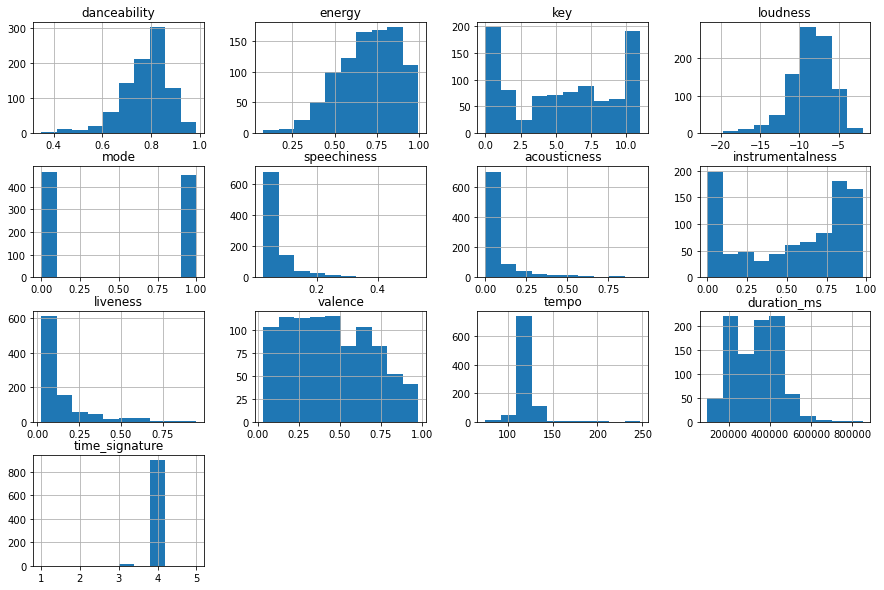

In [441]:
playlist_final.hist(figsize=(15,10));

In [442]:
playlist_final.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,0.775715,0.695865,5.554951,-8.583304,0.491839,0.075868,0.085101,0.533583,0.145194,0.443553,122.249122,332593.394995,3.976061
std,0.096095,0.176425,3.680156,2.713493,0.500206,0.060200,0.163329,0.345698,0.137044,0.249461,9.838175,111342.990920,0.196576
min,0.349000,0.078600,0.000000,-21.739000,0.000000,0.025700,0.000008,0.000000,0.022600,0.033600,74.885000,96000.000000,1.000000
25%,0.726000,0.575000,2.000000,-10.009000,0.000000,0.045300,0.002370,0.161500,0.075350,0.234000,120.021500,230139.500000,4.000000
50%,0.795000,0.715000,6.000000,-8.280000,0.000000,0.058000,0.014900,0.645000,0.102000,0.422000,123.017000,343912.000000,4.000000
75%,0.835000,0.836500,9.000000,-6.760000,1.000000,0.078350,0.082200,0.856500,0.137000,0.642000,125.007000,412554.500000,4.000000
max,0.985000,0.995000,11.000000,-1.956000,1.000000,0.533000,0.945000,0.976000,0.950000,0.980000,247.957000,849960.000000,5.000000


In [443]:
num_X = playlist_final.select_dtypes(include=np.number)

In [476]:
columns = num_X.columns

In [477]:
scaler = StandardScaler()

In [478]:
scaler.fit(num_X)

StandardScaler()

In [479]:
X_prep = scaler.transform(num_X)

In [446]:
X_prep_df = pd.DataFrame(X_prep, columns = columns)

In [447]:
X_prep_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.017856,-1.082437,-0.150878,-0.170978,-0.983809,-0.481466,-0.447809,-1.423935,-0.278850,0.009813,-0.431120,0.528418,0.121847
1,0.200798,-0.781862,0.936625,0.237574,-0.983809,-0.742407,0.201539,-1.373285,-0.293452,-0.792354,-1.039389,-1.104805,0.121847
2,0.950468,-0.526656,-0.966504,0.426363,-0.983809,-0.202242,1.659510,-1.384283,-0.501527,0.936315,-0.739576,-0.965224,0.121847
3,0.429864,-0.413232,0.664749,0.636907,1.016457,-0.258751,-0.307526,-0.742622,-0.608120,0.250463,-0.636656,0.432203,0.121847
4,0.148738,-0.277122,0.664749,0.682630,-0.983809,-0.637698,0.703865,-1.228861,-0.500797,1.225095,-1.753019,-1.239067,0.121847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,0.232034,1.044274,1.480376,0.721715,1.016457,-0.521355,-0.516616,1.138657,-0.278850,-1.504276,0.380651,0.589811,0.121847
915,0.346567,0.284329,0.392874,-1.308140,1.016457,-0.483128,-0.520949,1.176283,-0.227743,-1.630617,-0.025539,1.368119,0.121847
916,-0.913295,1.503643,0.936625,0.118474,1.016457,-0.542961,0.513961,0.716093,-0.271549,-0.547693,1.308768,1.553450,0.121847
917,0.273683,-0.611725,1.208500,-0.908068,-0.983809,-0.272048,-0.338155,0.996838,-0.459912,-1.576070,0.685447,0.779617,0.121847


In [448]:
# Try to run Kmeans with all values of K, from 2 to 20
K = range(2, 50)

# For each model, store the inertia in a list
inertia = []

for i in K:
    kmeans1 = KMeans(n_clusters=i, init="random", n_init=10, max_iter=200,tol=0,algorithm="full", random_state=40)
    kmeans1.fit(X_prep)
    inertia.append(kmeans1.inertia_)


print(inertia)

[10613.860046803858, 9707.330255143332, 9146.668088157741, 8634.729289565408, 7994.774706886501, 7531.487850065172, 7168.64826495955, 6930.942449993516, 6687.02793351902, 6490.548957559769, 6377.111891754172, 6113.717374640924, 5923.225850865112, 5809.286254817258, 5748.186260553211, 5673.478912203182, 5562.534975963784, 5420.123088169237, 5331.9620645070745, 5268.097210509198, 5033.845846233276, 4969.418586468432, 4882.315178443978, 4854.093978307104, 4752.587277888717, 4695.039025456128, 4638.703118792346, 4600.97684922451, 4507.11837822436, 4497.150866855186, 4447.916799885628, 4417.901191379014, 4378.095332936721, 4328.938484602231, 4309.010249957671, 4226.3473012719805, 4176.799010740141, 4212.914184461152, 4127.85139457372, 4109.183246573452, 4084.9502144797702, 4040.1007006362365, 4073.4219205119, 4058.185532894223, 3996.2398060954483, 3993.5109183274594, 3885.8617678862392, 3820.3887935626335]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

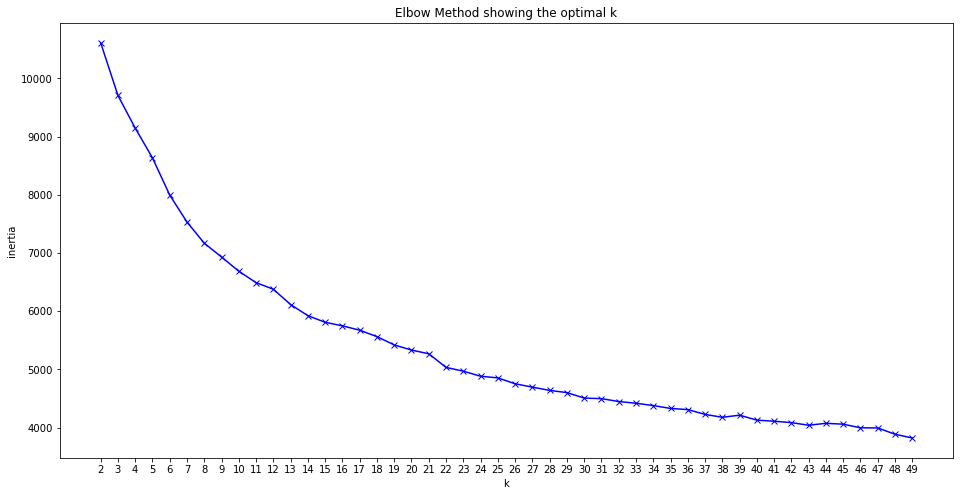

In [449]:
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [450]:
K = range(2, 20)

silhouettes = []

for k in K: 
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(X_prep)
    silhouettes.append(silhouette_score(X_prep, kmeans.predict(X_prep)))

Text(0, 0.5, 'silhouette score')

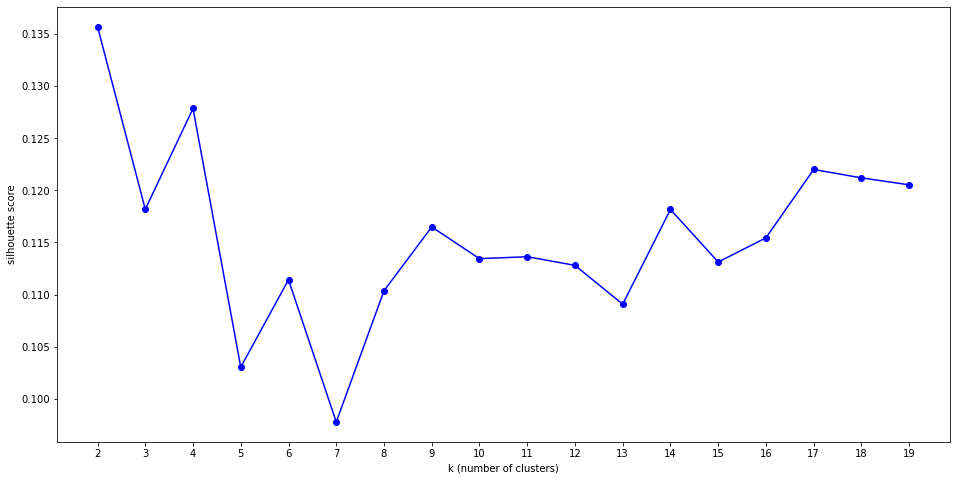

In [451]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.ylabel('silhouette score')

In [452]:
kmeans = KMeans(n_clusters=12, random_state=40)
kmeans.fit(X_prep)
kmeans.predict(X_prep)

array([ 3,  5,  5,  1,  5,  5, 11,  2,  6,  3, 10,  3, 11,  3,  3, 11,  3,
        5, 11, 11,  5, 11,  3,  3,  2,  2, 11,  3, 10,  7,  4,  3,  0,  3,
       11, 10,  3,  5,  3,  5,  2,  5,  8,  5,  8, 11,  3,  1,  2, 11,  1,
        8,  2,  8,  8,  8,  8,  5,  6,  3,  3,  1,  3,  7, 10,  5,  3,  3,
        8,  4, 11, 11,  3,  3,  2,  3, 11,  3, 11, 10,  1,  3, 11,  7,  3,
       11,  2, 11,  2,  3, 11,  4,  3, 10,  3,  5,  2,  3,  2,  6,  8,  2,
        6,  2,  0,  3,  1,  8,  8,  5, 11,  3,  0,  6,  3,  6,  6,  6,  1,
        8,  6, 11,  0,  3,  4,  6,  6,  4,  8,  6,  3, 10, 11,  1,  8,  3,
        5,  3,  8,  4,  5,  3, 11,  5,  8,  3,  6, 11, 10,  4,  3, 11,  3,
        1,  3,  6,  8, 11, 11, 11,  5, 11,  3,  8,  6,  8,  0,  1,  3,  8,
        1,  6,  8, 10, 11, 10,  8,  6, 10,  3,  2,  0,  1,  6,  3,  3, 11,
        5,  8, 11,  8,  1,  8,  1,  3,  0, 11,  8,  2,  2,  2,  5,  2,  2,
        3, 10, 10,  2,  3,  2,  2, 10,  3,  2, 11,  3,  6, 10,  9,  8,  8,
        1,  2,  2, 11,  3

In [472]:
X_prep.shape

(919, 13)

In [454]:
playlist_final['Cluster']= kmeans.predict(X_prep)

<ipython-input-454-179c972f5317>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_final['Cluster']= kmeans.predict(X_prep)


In [455]:
playlist_final.shape

(919, 21)

Prototype

In [456]:
url = "https://www.billboard.com/charts/hot-100"

response = requests.get(url)

In [457]:
music = BeautifulSoup(response.content,'html.parser')

In [458]:
title = []
artist =[]

len_music=len(music.select("span.chart-element__information__song"))

In [459]:
for i in tqdm(range(len_music)):
    title.append(music.select("span.chart-element__information__song")[i].text)
    artist.append(music.select("span.chart-element__information__artist")[i].text)

  0%|          | 0/100 [00:00<?, ?it/s]

In [460]:
music_top100 = pd.DataFrame({'title':title,"artist":artist})

In [461]:
song = input("What song do you like? ")

What song do you like? Butter


In [462]:
if song in title:
    n = random.choice(title)
    print("You should like..." + n)
else:
    
    print("Seems like you like songs off the beaten path, I recommend..."+ l)    

You should like...Having Our Way


In [463]:
results = sp.search(q= song, limit = 1)

In [464]:
song_features=pd.DataFrame(sp.audio_features(results['tracks']['items'][0]['id']))

In [465]:
song_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.759,0.459,8,-5.187,1,0.0948,0.00323,0,0.0906,0.695,109.997,audio_features,2bgTY4UwhfBYhGT4HUYStN,spotify:track:2bgTY4UwhfBYhGT4HUYStN,https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...,https://api.spotify.com/v1/audio-analysis/2bgT...,164442,4


In [466]:
X = song_features.select_dtypes(include=np.number)

In [480]:
X_ = scaler.transform(X)

In [481]:
X_.shape

(1, 13)

In [488]:
cluster_user = kmeans.predict(X_)[0]

In [491]:
cluster_songs = playlist_final[playlist_final["Cluster"]==cluster_user]

In [ ]:
cluster_songs

In [492]:
song_features['Cluster']= kmeans.predict(X_)

In [495]:
n = random.choice(cluster_songs['Name'])

KeyError: 103